# Extracting upstream seqs from genbank files for 5 organisms

In [1]:
import Bio
from Bio import SeqIO, SeqFeature
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import genbank_utils as gu

In [2]:
# genbank files
gbFile_5G = '/work/ewilson6/workspace/promoter-id-from-rnaseq/data/5GB1c_sequence_20220411.gb'
gbFile_ecoli = '/work/ewilson6/workspace/promoter-id-from-rnaseq/data/ecoli_NC_000913.3.gb'
gbFile_cauto = '/work/ewilson6/workspace/promoter-id-from-rnaseq/data/cauto_sequence.gb'
gbFile_bsub = '/work/ewilson6/workspace/promoter-id-from-rnaseq/data/bsubtilis_AL009126.gbff'
gbFile_tmari = '/work/ewilson6/workspace/promoter-id-from-rnaseq/data/tmaritima3.gb'


# General Genome info
Basic counts of various gene and CDS features in the 5G and E. coli genome genbank files

In [3]:
def look_at_gb(file, org_name):
    gb = SeqIO.parse(file, "genbank").__next__()
    #gb_ecoli = SeqIO.parse(gbFile_ecoli, "genbank").__next__()

    print(f"___ {org_name} ____")
    print("Genome length:", len(gb.seq), "bps")
    print("num features:", len(gb.features))
    print("num CDS features:", len([x for x in gb.features if x.type=='CDS']))
    print("num gene features:", len([x for x in gb.features if x.type=='gene']))
    print("A:",gb.seq.count("A")/len(gb.seq))
    print("C:",gb.seq.count("C")/len(gb.seq))
    print("G:",gb.seq.count("G")/len(gb.seq))
    print("T:",gb.seq.count("T")/len(gb.seq))
    
    return gb

# print("\n___ Ecoli ____")
# print("Genome length:", len(gb_ecoli.seq), "bps")
# print("num features:", len(gb_ecoli.features))
# print("num CDS features:", len([x for x in gb_ecoli.features if x.type=='CDS']))
# print("num gene features:", len([x for x in gb_ecoli.features if x.type=='gene']))
# print("A:",gb_ecoli.seq.count("A")/len(gb_ecoli.seq))
# print("C:",gb_ecoli.seq.count("C")/len(gb_ecoli.seq))
# print("G:",gb_ecoli.seq.count("G")/len(gb_ecoli.seq))
# print("T:",gb_ecoli.seq.count("T")/len(gb_ecoli.seq))


In [4]:
gb_5G = look_at_gb(gbFile_5G, "5G")
gb_ecoli = look_at_gb(gbFile_ecoli, "ecoli")
gb_bsub = look_at_gb(gbFile_bsub, "bsub")
gb_tmari = look_at_gb(gbFile_tmari, "tmari")
gb_cauto = look_at_gb(gbFile_cauto, "cauto")


___ 5G ____
Genome length: 4998879 bps
num features: 8478
num CDS features: 4177
num gene features: 4234
A: 0.256196639286528
C: 0.24354360247567505
G: 0.24364442508010295
T: 0.25661533315769397
___ ecoli ____
Genome length: 4641652 bps
num features: 9900
num CDS features: 4357
num gene features: 4566
A: 0.24619295026856816
C: 0.2542394388894299
G: 0.25366765970391575
T: 0.2458999511380862
___ bsub ____
Genome length: 4215606 bps
num features: 9074
num CDS features: 4325
num gene features: 4536
A: 0.28182733395862897
C: 0.2180668686779552
G: 0.21707721262376037
T: 0.2830285847396555
___ tmari ____
Genome length: 1869612 bps
num features: 3905
num CDS features: 1891
num gene features: 1946
A: 0.2696297413581
C: 0.2278601121516122
G: 0.23462729165195773
T: 0.2678828548383301
___ cauto ____
Genome length: 4352205 bps
num features: 8274
num CDS features: 3992
num gene features: 4093
A: 0.34708268567312434
C: 0.1527595781908251
G: 0.1581593697907153
T: 0.3419983663453353


In [5]:
# # print some example feature info from each genome    
for x in gb_cauto.features[:10]:
    print(x)
    

type: source
location: [0:4352205](+)
qualifiers:
    Key: collection_date, Value: ['1993']
    Key: country, Value: ['Belgium']
    Key: culture_collection, Value: ['DSM:10061']
    Key: db_xref, Value: ['taxon:1341692']
    Key: host, Value: ['rabbit']
    Key: isolation_source, Value: ['Rabbit feces']
    Key: mol_type, Value: ['genomic DNA']
    Key: organism, Value: ['Clostridium autoethanogenum DSM 10061']
    Key: strain, Value: ['DSM 10061']
    Key: type_material, Value: ['type strain of Clostridium autoethanogenum']

type: gene
location: [78:285](+)
qualifiers:
    Key: locus_tag, Value: ['CAETHG_RS00005']
    Key: old_locus_tag, Value: ['CAETHG_0001']

type: CDS
location: [78:285](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: inference, Value: ['COORDINATES: similar to AA sequence:RefSeq:WP_014355090.1']
    Key: locus_tag, Value: ['CAETHG_RS00005']
    Key: note, Value: ['Derived by automated computational analysis using gene prediction method: Protein Homology

In [6]:
def look_at_feats(feats2find, gb_rec):
    for x in gb_rec.features:
        if x.type in feats2find:
            print(x)


In [7]:
from collections import Counter

In [8]:
#look_at_feats(['gene',''],gb_5G)

In [9]:
gbs = {
    '5G':gb_5G,
    'ecoli':gb_ecoli,
    'bsub':gb_bsub,
    'tmari':gb_tmari,
    'cauto':gb_cauto
}

for org in gbs:
    gb_rec = gbs[org]
    types = set([x.type for x in gb_rec.features if x.type!='CDS'])
    c = Counter([x.type for x in gb_rec.features])
    cds = [x for x in gb_rec.features if (x.type=='gene' and 'locus_tag' in x.qualifiers)]

    print(org)
    print(c)
    print(len(cds))
    print()

5G
Counter({'gene': 4234, 'CDS': 4177, 'tRNA': 44, 'rRNA': 9, 'regulatory': 5, 'repeat_region': 4, 'ncRNA': 3, 'source': 1, 'tmRNA': 1})
4234

ecoli
Counter({'gene': 4566, 'CDS': 4357, 'repeat_region': 697, 'tRNA': 86, 'ncRNA': 72, 'mobile_element': 49, 'misc_feature': 48, 'rRNA': 22, 'source': 1, 'misc_recomb': 1, 'rep_origin': 1})
4566

bsub
Counter({'gene': 4536, 'CDS': 4325, 'misc_RNA': 93, 'tRNA': 86, 'rRNA': 30, 'ncRNA': 2, 'source': 1, 'misc_feature': 1})
4536

tmari
Counter({'gene': 1946, 'CDS': 1891, 'tRNA': 46, 'repeat_region': 8, 'misc_binding': 4, 'rRNA': 3, 'ncRNA': 3, 'misc_feature': 2, 'source': 1, 'tmRNA': 1})
1946

cauto
Counter({'gene': 4093, 'CDS': 3992, 'tRNA': 68, 'regulatory': 49, 'misc_binding': 32, 'rRNA': 27, 'ncRNA': 5, 'misc_feature': 3, 'repeat_region': 3, 'source': 1, 'tmRNA': 1})
4093



## CDS processing
Extract CDS (coding sequence) features and their coordinates, +/- strand info

In [10]:
# def get_cds_coords(genbank_path):
#     '''
#     Given a genbank file, parse it and return a list of all the CDS start/end
#     coordinates and gene names
#     '''
#     seq_record = SeqIO.parse(genbank_path, "genbank").__next__()
#     cds_list = []
#     # Loop over the genome file, get the CDS features on each of the strands
#     for feature in seq_record.features:
#         if feature.type == 'CDS':
#             # get  locus tag and gene name
#             lt = feature.qualifiers['locus_tag'][0]
#             g = "" if 'gene' not in feature.qualifiers else feature.qualifiers['gene'][0]
            
#             cds_list.append((feature.location.start.position,
#                              feature.location.end.position,
#                              feature.strand,
#                              lt,
#                              g))
#     return cds_list

In [11]:
def get_gbfeats2exclude():
    '''
    Open the config file specifying which kinds of genbank features
    to exclude when extracting pos and neg feats (these are typically
    features that a user may find are just redundant entries. For example,
    in the M. buryatense genbank file, there are duplicate entries labeled
    as "CDS" and "gene" that have the same coordinate/locus tag. I decided
    to go with "CDS" and exclude the "gene" version of each feature. 
    
    A user can amend this configuration in config/gbfeats2exclude.txt"
    '''
    with open('config/gbfeats2exclude.txt','r') as f:
        lines = [x.strip() for x in f.readlines()]
    return lines

def get_all_features(gb_file):
    '''
    Given a genbank file, load its features and exclude types of features
    we don't want (in config/gbfeats2exclude.txt)
    '''
    TYPE_IDX=5
    feats = gu.get_feature_tuples_from_genbank(gb_file)
    gbfeats2exclude = get_gbfeats2exclude()

    feats_filt = [x for x in feats if (x[TYPE_IDX] not in gbfeats2exclude)]

    return feats_filt

In [12]:
# print example CDS entries extracted into a list
cds_5G = get_all_features(gbFile_5G)
print(cds_5G[:10])
cds_ecoli = get_all_features(gbFile_ecoli)
print(cds_ecoli[:10])
cds_bsub = get_all_features(gbFile_bsub)
print(cds_bsub[:10])
cds_tmari = get_all_features(gbFile_tmari)
print(cds_tmari[:10])
cds_cauto = get_all_features(gbFile_cauto)
print(cds_cauto[:10])


[(0, 1317, 1, 'EQU24_RS00005', 'dnaA', 'CDS'), (1502, 2603, 1, 'EQU24_RS00010', 'dnaN', 'CDS'), (3060, 4140, 1, 'EQU24_RS00015', 'recF', 'CDS'), (4185, 6600, 1, 'EQU24_RS00020', 'gyrB', 'CDS'), (7350, 7734, 1, 'EQU24_RS00035', '', 'CDS'), (7818, 9075, 1, 'EQU24_RS00040', '', 'CDS'), (9071, 10241, 1, 'EQU24_RS00045', '', 'CDS'), (10240, 13306, 1, 'EQU24_RS00050', '', 'CDS'), (13298, 13604, 1, 'EQU24_RS00055', '', 'CDS'), (13842, 16413, 1, 'EQU24_RS00060', '', 'CDS')]
[(189, 255, 1, 'b0001', 'thrL', 'CDS'), (336, 2799, 1, 'b0002', 'thrA', 'CDS'), (2800, 3733, 1, 'b0003', 'thrB', 'CDS'), (3733, 5020, 1, 'b0004', 'thrC', 'CDS'), (5233, 5530, 1, 'b0005', 'yaaX', 'CDS'), (5682, 6459, -1, 'b0006', 'yaaA', 'CDS'), (6528, 7959, -1, 'b0007', 'yaaJ', 'CDS'), (8237, 9191, 1, 'b0008', 'talB', 'CDS'), (9305, 9893, 1, 'b0009', 'mog', 'CDS'), (9927, 10494, -1, 'b0010', 'satP', 'CDS')]
[(409, 1750, 1, 'BSU_00010', 'dnaA', 'CDS'), (1938, 3075, 1, 'BSU_00020', 'dnaN', 'CDS'), (3205, 3421, 1, 'BSU_00030',

In [13]:
print("5G:",len(cds_5G))
print("ecoli:",len(cds_ecoli))
print("bsub:",len(cds_bsub))
print("tmari:",len(cds_tmari))
print("cauto:",len(cds_cauto))



5G: 4234
ecoli: 4537
bsub: 4443
tmari: 1944
cauto: 4093


### Distribution of CDS lengths

In [14]:
cds_5G[0]

(0, 1317, 1, 'EQU24_RS00005', 'dnaA', 'CDS')

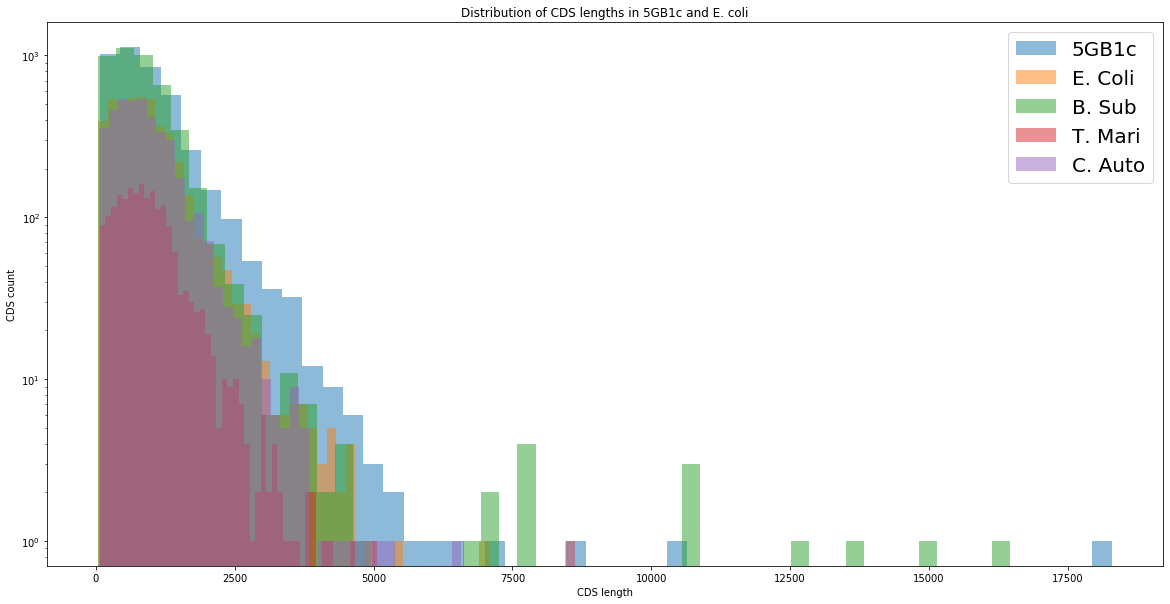

In [15]:
cds_5G_lengths = [e-s for (s,e,_,_,_,_) in cds_5G]
cds_ecoli_lengths = [e-s for (s,e,_,_,_,_) in cds_ecoli]
cds_bsub_lengths = [e-s for (s,e,_,_,_,_) in cds_bsub]
cds_tmari_lengths = [e-s for (s,e,_,_,_,_) in cds_tmari]
cds_cauto_lengths = [e-s for (s,e,_,_,_,_) in cds_cauto]

plt.figure(figsize=(20,10))
plt.hist(cds_5G_lengths, alpha = 0.5, bins=50, label='5GB1c')
plt.hist(cds_ecoli_lengths, alpha = 0.5, bins=50, label='E. Coli')
plt.hist(cds_bsub_lengths, alpha = 0.5, bins=50, label='B. Sub')
plt.hist(cds_tmari_lengths, alpha = 0.5, bins=50, label='T. Mari')
plt.hist(cds_cauto_lengths, alpha = 0.5, bins=50, label='C. Auto')
plt.yscale('log')
plt.xlabel("CDS length")
plt.ylabel("CDS count")
plt.title("Distribution of CDS lengths in 5GB1c and E. coli")
plt.legend(fontsize = 20)
plt.show()

### Distribution of CDSs across genome
Exploring the distribution of CDS annotations through the length of the genome. Are some areas more densely packed than others?

First viz type: create a histogram of annotation counts across the genome by position. Taller bars indicate more CDS annotations occur in that window.

In [16]:
# get the middle coordinate of each feature and make a histogram

cds_mean_coord_5G = [np.mean([e,s]) for (s,e,_,_,_,_) in cds_5G]
cds_mean_coord_ecoli = [np.mean([e,s]) for (s,e,_,_,_,_) in cds_ecoli]
cds_mean_coord_bsub = [np.mean([e,s]) for (s,e,_,_,_,_) in cds_bsub]
cds_mean_coord_tmari = [np.mean([e,s]) for (s,e,_,_,_,_) in cds_tmari]
cds_mean_coord_cauto = [np.mean([e,s]) for (s,e,_,_,_,_) in cds_cauto]

Second viz type: The skinny bars in the histrogram are a little awkward and hard to see. This time, instead of a histogram, I make a heatmap where the darker color indicates more genes fall within this window along the genome. 

In [17]:
# Use numpy's histogram function to get bin the genes and 
# get the edge values for the heatmap

counts_5G,edges_5G = np.histogram(cds_mean_coord_5G, 
                                  bins=np.arange(0,5000000,10000))

counts_ecoli,edges_ecoli = np.histogram(cds_mean_coord_ecoli, 
                                        bins=np.arange(0,5000000,10000))

counts_bsub,edges_bsub = np.histogram(cds_mean_coord_bsub, 
                                        bins=np.arange(0,5000000,10000))

counts_tmari,edges_tmari = np.histogram(cds_mean_coord_tmari, 
                                        bins=np.arange(0,5000000,10000))

counts_cauto,edges_cauto = np.histogram(cds_mean_coord_cauto, 
                                        bins=np.arange(0,5000000,10000))

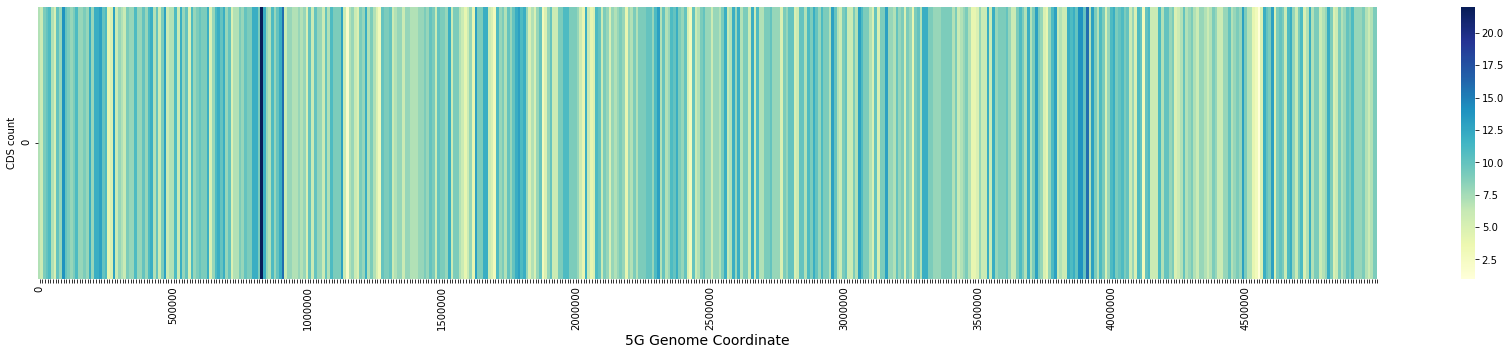

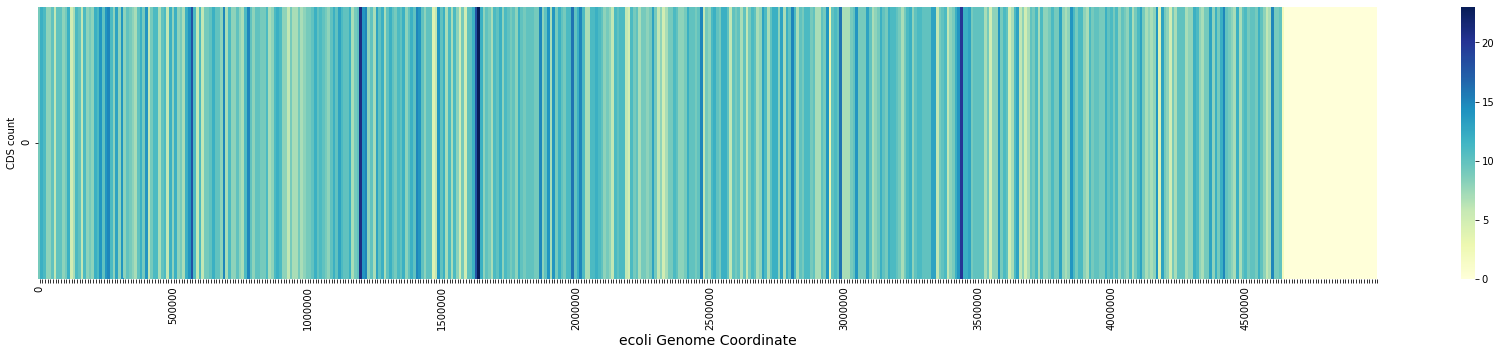

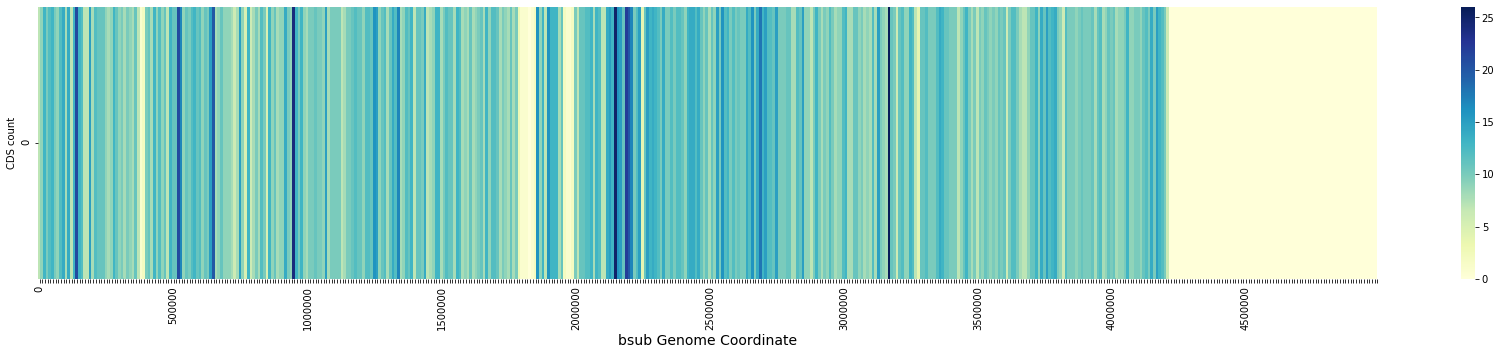

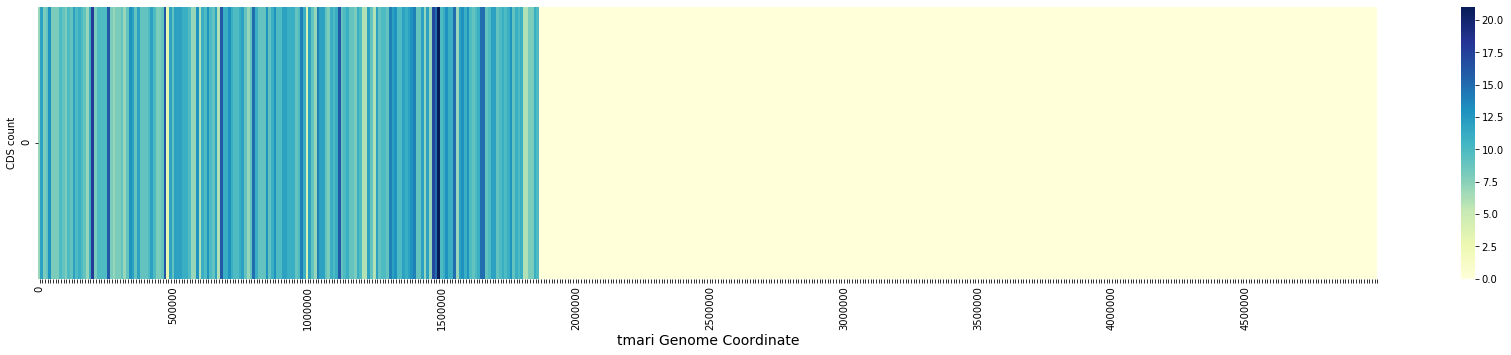

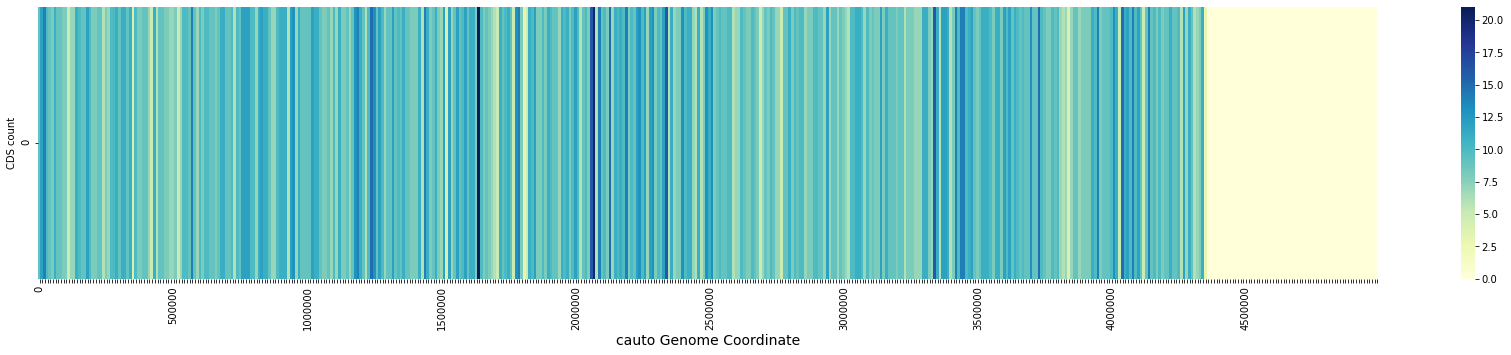

In [18]:
def genome_cds_heatmap(org,counts,edges):
    # 5G heatmap
    plt.figure(figsize=(30,5))
    #sns.set(font_scale=2)
    g = sns.heatmap([counts], xticklabels=edges, cmap="YlGnBu")

    # reduce number of ticks on the x-axis
    for i,label in enumerate(g.xaxis.get_ticklabels()):
        if (i % 50) != 0:
            label.set_visible(False)

    plt.xlabel(f"{org} Genome Coordinate", fontsize=14)
    plt.ylabel("CDS count")
    plt.show()

genome_cds_heatmap("5G",counts_5G,edges_5G)
genome_cds_heatmap("ecoli",counts_ecoli,edges_ecoli)
genome_cds_heatmap("bsub",counts_bsub,edges_bsub)
genome_cds_heatmap("tmari",counts_tmari,edges_tmari)
genome_cds_heatmap("cauto",counts_cauto,edges_cauto)

# Write out locus tags of all loci for each org

In [21]:
def write_out_locus_tags(cds_list,outf):
    with open(outf,'w') as f:
        f.write(f'locus_tag\tdummy\n')
        for (_,_,_,locus_tag,_,_) in cds_list:
            f.write(f'{locus_tag}\tFalse\n')

In [22]:
write_out_locus_tags(cds_5G,'organism_loci/5G_loci.txt')
write_out_locus_tags(cds_ecoli,'organism_loci/ecoli_loci.txt')
write_out_locus_tags(cds_bsub,'organism_loci/bsub_loci.txt')
write_out_locus_tags(cds_tmari,'organism_loci/tmari_loci.txt')
write_out_locus_tags(cds_cauto,'organism_loci/cauto_loci.txt')

# Use promoter files to create XY df
Generated by `extract_upstream_region.py` script

In [26]:
def load_promoter_seqs(filename):
    '''
    Load fasta file of promoters into ID, desc, and seq. It expects
    each fasta header to be divided by "|" with in the format:
    LOCUS_TAG|GENE_SYMBOL|PRODUCT
    '''
    proms = []
    with open(filename,'r') as f:
        for line in f:
            if line.startswith(">"):
                full_header = line.strip()[1:].strip()
                locus_tag = full_header.split('|')[0]
            else:
                seq = line.strip().upper()
                proms.append((locus_tag,full_header,seq))
                
    return proms

In [40]:
def parse_loc2info(locus_tag,header,seq):
    gene = header.split('|')[1]
    prod = header.split('|')[2]
    
    #return (locus_tag,{'gene':gene,'product':prod,'seq':seq})
    return [locus_tag,gene,prod,seq]

In [56]:
def get_org_info_from_promoter_fasta(filename):
    proms = load_promoter_seqs(filename)
    loc2info = [parse_loc2info(x,y,z) for (x,y,z) in proms]
    return loc2info

In [57]:
loc2info_ecoli = get_org_info_from_promoter_fasta('organism_loci/ecoli_loci_upstream_regions_w300_min20.fa')
loc2info_ecoli

[['b0001',
  'thrL',
  'thr operon leader peptide',
  'ACAACAACGCCTGGGGCTTTTAGAGCAACGAGACACGGCAATGTTGCACCGTTTGCTGCATGATATTGAAAAAAATATCACCAAATAAAAAACGCCTTAGTAAGTATTTTTCAGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATC'],
 ['b0002',
  'thrA',
  'fused aspartate kinase/homoserine dehydrogenase 1',
  'CTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGGTAACGAGGTAACAAC'],
 ['b0003',
  'thrB',
  'homoserine kinase',
  'CTGTCACAACTCGACGATCTCTTTGCCGCGCGCGTGGCGAAGGCCCGTGATGAAGGAAAAGTTTTGCGCTATGTTGGCAATATTGATGAAGATGGCGTCTGCCGCGTGAAGATTGCCGAAGTGGATGGTAATGATCCGCTGTTCAAAGTGAAAAATGGCGAAAACGCCCTGGCCTTCTATAGCCACTATTATCAGCCGCTGCCGTTGGTAC

In [62]:
all_org_df = pd.DataFrame()
orgs = ['5G','ecoli','bsub','tmari','cauto']

for i,org in enumerate(orgs):
    org_info = get_org_info_from_promoter_fasta(f'organism_loci/{org}_loci_upstream_regions_w300_min20.fa')
    org_df = pd.DataFrame(org_info,columns=['locus_tag','gene','product','upstream_region'])
    org_df['org'] = org
    org_df['id'] = i
    
    all_org_df = pd.concat([all_org_df,org_df])
    
all_org_df

,locus_tag,gene,product,upstream_region,org,id
0,EQU24_RS00005,dnaA,chromosomal replication initiator protein DnaA,ACTGTTAGCTTGGCACGGCCCTTGGCTCTGCGGGCGTTAAGGACTT...,5G,0
1,EQU24_RS00010,dnaN,DNA polymerase III subunit beta,GTGGACGCGATCACACCACGGTTATTAATGCTTGTAAACGCATTGC...,5G,0
2,EQU24_RS00015,recF,DNA replication/repair protein RecF,TTGCGAAGAGGGGCGGTTTCTCGTCCGACAGGCGTCGGCGGCAAGG...,5G,0
3,EQU24_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,ATTGTTAGTTCTATGTTTAAAGCTTGCGCAAGTACAATTATTGTCG...,5G,0
4,EQU24_RS00035,,hypothetical protein,GTATAAACCATGAAAGTCAGCCTATTTCGAAGATACCGACACCCTA...,5G,0
...,...,...,...,...,...,...
4088,CAETHG_RS20445,,4Fe-4S double cluster binding domain-containin...,ATTTGTTTCCTTGTTATCCATCAATTACCTCCTAAATTAATAATTT...,cauto,4
4089,CAETHG_RS20450,,cytosine permease,TTGTATATTATATTCCAACATAAGTATGTCCTCCTTTATAATATGG...,cauto,4
4090,CAETHG_RS20455,codA,cytosine deaminase,ATGGTATTTGGACCTATTTTTGGAATTATGATAACAGATTACTATT...,cauto,4
4091,CAETHG_RS20460,,immunity 22 family protein,AGATGAATATGATGTTATAAGAAAACAATCAGAGGTGCTGTATTCC...,cauto,4


In [75]:
# filter to only sequences with 300bp
final_df = all_org_df[all_org_df['upstream_region'].str.len() == 300]
final_df

,locus_tag,gene,product,upstream_region,org,id
0,EQU24_RS00005,dnaA,chromosomal replication initiator protein DnaA,ACTGTTAGCTTGGCACGGCCCTTGGCTCTGCGGGCGTTAAGGACTT...,5G,0
1,EQU24_RS00010,dnaN,DNA polymerase III subunit beta,GTGGACGCGATCACACCACGGTTATTAATGCTTGTAAACGCATTGC...,5G,0
2,EQU24_RS00015,recF,DNA replication/repair protein RecF,TTGCGAAGAGGGGCGGTTTCTCGTCCGACAGGCGTCGGCGGCAAGG...,5G,0
3,EQU24_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,ATTGTTAGTTCTATGTTTAAAGCTTGCGCAAGTACAATTATTGTCG...,5G,0
4,EQU24_RS00035,,hypothetical protein,GTATAAACCATGAAAGTCAGCCTATTTCGAAGATACCGACACCCTA...,5G,0
...,...,...,...,...,...,...
4088,CAETHG_RS20445,,4Fe-4S double cluster binding domain-containin...,ATTTGTTTCCTTGTTATCCATCAATTACCTCCTAAATTAATAATTT...,cauto,4
4089,CAETHG_RS20450,,cytosine permease,TTGTATATTATATTCCAACATAAGTATGTCCTCCTTTATAATATGG...,cauto,4
4090,CAETHG_RS20455,codA,cytosine deaminase,ATGGTATTTGGACCTATTTTTGGAATTATGATAACAGATTACTATT...,cauto,4
4091,CAETHG_RS20460,,immunity 22 family protein,AGATGAATATGATGTTATAAGAAAACAATCAGAGGTGCTGTATTCC...,cauto,4


In [76]:
final_df.to_csv("data/5org_upstream_regions.tsv",sep='\t',index=False)

In [77]:
final_df['org'].value_counts()

ecoli    4537
bsub     4442
5G       4233
cauto    4093
tmari    1944
Name: org, dtype: int64

# Save some stratified train/test splits

In [80]:
def view_train_test_dist(train_df,test_df,score_cols,title,id_col='locus_tag',val_df=None):
    train_df['set'] = 'train'
    test_df['set'] = 'test'
    if val_df is not None:
        val_df['set'] = "val"
        df = pd.concat([train_df,test_df,val_df])
    else:
        df = pd.concat([train_df,test_df])
    
    df_melt = pd.melt(df, id_vars=[id_col,'set'],value_vars=score_cols,var_name='cond',value_name='score')
    
    sns.stripplot(data=df_melt,x='cond',y='score',hue='set',dodge=True,alpha=0.2)
    plt.title(f"{title} distribution")
    plt.show()
    
    sns.violinplot(data=df_melt,x='cond',y='score',hue='set',dodge=True,alpha=0.2)
    plt.title(f"{title} distribution")
    plt.show()
    
#     sns.boxplot(data=df_melt,x='cond',y='score',hue='set',dodge=True)
#     plt.title(f"{title} distribution")
#     plt.show()
    sns.countplot(data=df_melt,x='score',hue='set')
    plt.title(f"{title} counts")
    plt.show()

In [78]:
from sklearn.model_selection import StratifiedKFold 

In [79]:
skf = StratifiedKFold(n_splits=5)


_____Split 0____


<ipython-input-80-7cf98d9c516a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
<ipython-input-80-7cf98d9c516a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


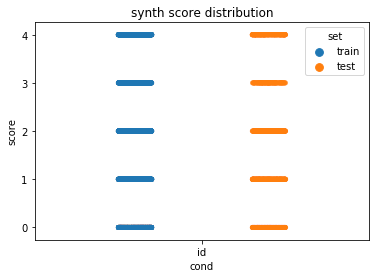

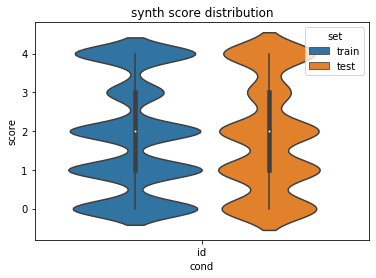

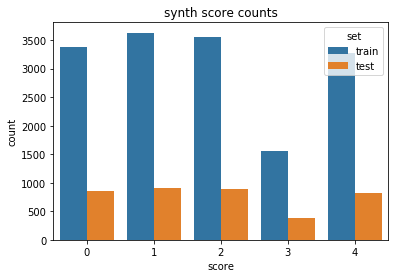


_____Split 1____


<ipython-input-80-7cf98d9c516a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
<ipython-input-80-7cf98d9c516a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


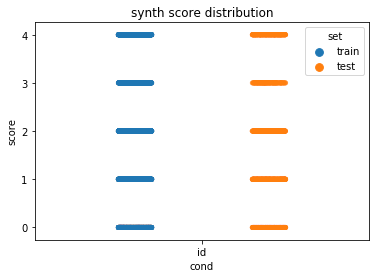

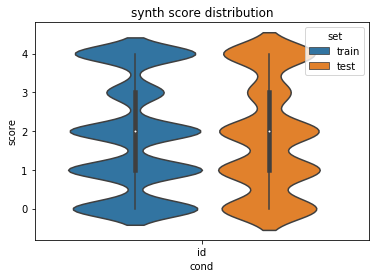

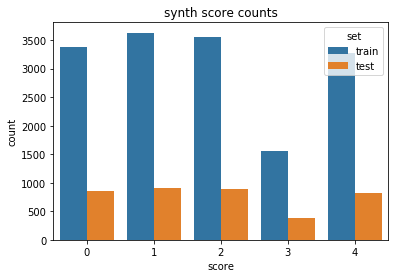


_____Split 2____


<ipython-input-80-7cf98d9c516a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
<ipython-input-80-7cf98d9c516a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


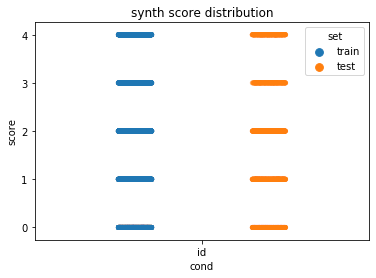

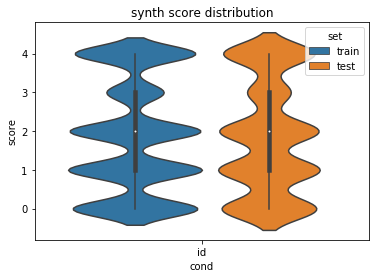

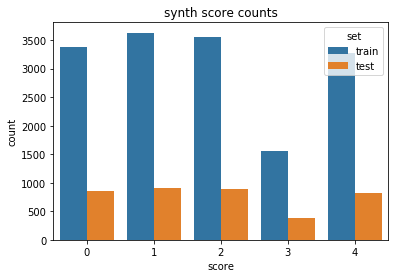


_____Split 3____


<ipython-input-80-7cf98d9c516a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
<ipython-input-80-7cf98d9c516a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


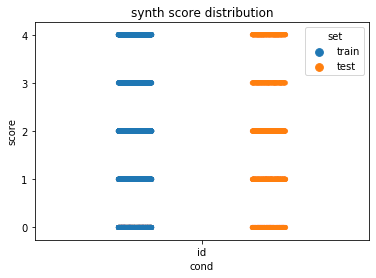

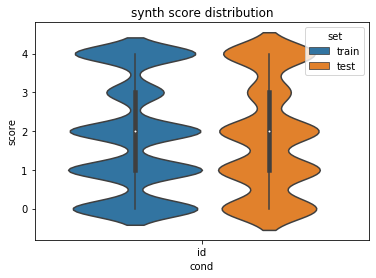

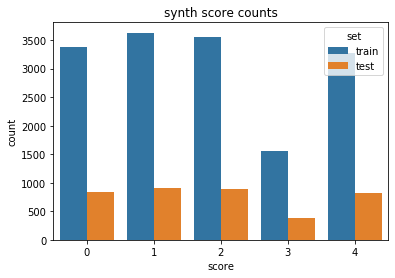


_____Split 4____


<ipython-input-80-7cf98d9c516a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
<ipython-input-80-7cf98d9c516a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


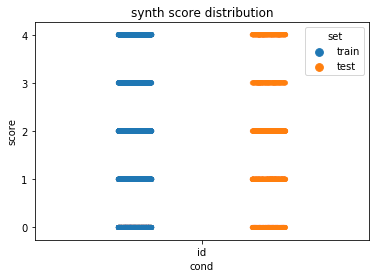

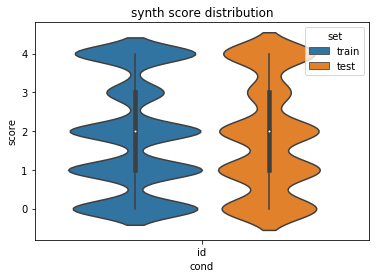

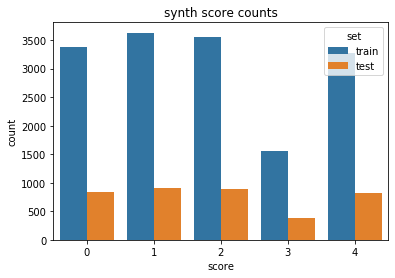

In [84]:
for i, (train_idxs, test_idxs) in enumerate(skf.split(final_df, final_df['id'])):
    print(f"_____Split {i}____")
    train_df = final_df.iloc[train_idxs]
    test_df = final_df.iloc[test_idxs]
    
    score_col = "id"

    view_train_test_dist(train_df, test_df,[score_col],"synth score",id_col='locus_tag')
    
    print("")
    
    split_dfs = {
        'train':train_df,
        'test':test_df
    }
    
    train_df.to_csv(f'data/5org_cls_splits/cv{i}_train.tsv',index=False,sep='\t')
    test_df.to_csv(f'data/5org_cls_splits/cv{i}_test.tsv',index=False,sep='\t')

# Promoter Extraction
Now that we've examined the CDSs and regions between, now let's focus on pulling out hypothetical promoter regions. For now, the simple "naive" strategy is to slice out a window ~300 bp upstream of a CDS. The slightly better "operon" strategy is to do the same thing but ignore the slice if there exists an upstream CDS too close together (<40 bp away, same strand). This is an approximation for "maybe these genes are in an operon."

In [23]:
# def get_promoters(gb_record, 
#                   cds_list, 
#                   promoter_window = 300,
#                   operon_mode = False, 
#                   min_gene_distance=40):
#     '''
#     Given a list of CDSs with (LEFT, RIGHT, STRAND, locus, gene),
#     loop through and collect their promoters by getting the 300 bp
#     upstream of the start codon. If in operon conscious mode, ignore 
#     regions that fall within min_gene_distance bp of another gene. 
#     (Won't exhaustively consider all operons but a quick-n-dirty start)
#     '''
#     promoters = []
#     candidate_operon_genes = []
#     operon_locs = []
    
#     for i,(g_left,g_right,strand,locus,gene) in enumerate(cds_list):
#         # keep track of whether or not to skip operon
#         operon_skip_flag = False
        
#         gene_string = "%s|%s" % (locus, gene)
        
#         # if we're on the negative strand, go 300bp to the right, reverse compelement
#         if strand == -1:
#             # get the range of the promoter region
#             p_left = g_right + 1
#             p_right = p_left + promoter_window
                
#             seq = gb_record.seq[p_left:p_right]
            
#             # if we're in operon mode and this isn't the last gene (aka no rightward operon),
#             # check the min_distance window for other annotations
#             if operon_mode and i < len(cds_list) -1:
#                 # get the FOLLOWING feature (because on -1 strand)
#                 upstream_gene = cds_list[i+1]
#                 # if the left side of the upstream gene is within min_distance
#                 if (
#                     upstream_gene[0] < (g_right + min_gene_distance) and
#                     upstream_gene[2] == strand # and same strand 
#                     ): 
#                     operon_skip_flag = True
                    
#                     # get the midpoint between the genes that are too close
#                     op_mid_point = (g_right + upstream_gene[0])/2
#                     operon_locs.append((op_mid_point, strand))
#                     # add the upstream locus and the current locus to candidate list
#                     candidate_operon_genes.append((upstream_gene, cds_list[i]))
        
#         # if we're on the positive strand, go 300bp to the left
#         else:
#             p_right = g_left - 1 
#             p_left = p_right - promoter_window
            
#             seq = gb_record.seq[p_left:p_right].reverse_complement()
            
#             # if we're in operon mode and this isn't the first gene (aka no leftward operon),
#             # check this window for other annotations
#             if operon_mode and i != 0:
#                 # get the PREVIOUS feature (because on +1 strand)
#                 upstream_gene = cds_list[i-1]
#                 # if the right side of the upstream gene is within min_distance
#                 if (
#                     upstream_gene[1] > (g_left - min_gene_distance) and 
#                     upstream_gene[2] == strand
#                     ): # and same strand
#                     operon_skip_flag = True
                    
#                     # get the midpoint between the genes that are too close
#                     op_mid_point = (g_left + upstream_gene[1])/2
#                     operon_locs.append((op_mid_point, strand))
#                     # add the upstream locus and the current locus to candidate list
#                     candidate_operon_genes.append((upstream_gene, cds_list[i]))
        
#         if not operon_skip_flag:
#             promoters.append((gene_string, str(seq)))
            
#     return promoters, operon_locs, candidate_operon_genes
        
        

In [24]:
naive_p,_,_ = gu.get_promoters_basic_slice(gb_5G,cds_5G)
operon_p,operon_locs,op_cand = gu.get_promoters_basic_slice(gb_5G, cds_5G, operon_mode = True)



In [25]:
# print the naive and operon promoter lists side by side.
# where we see numbers start to mismatch, we've called/skipped operons
for i,x in enumerate(naive_p[:20]):
    print(naive_p[i][0]) 
    print(operon_p[i][0])
    print()

EQU24_00005|dnaA
EQU24_00005|dnaA

EQU24_00010|
EQU24_00010|

EQU24_00015|recF
EQU24_00015|recF

EQU24_00020|gyrB
EQU24_00020|gyrB

EQU24_00025|
EQU24_00025|

EQU24_00030|
EQU24_00035|

EQU24_00035|
EQU24_00040|

EQU24_00040|
EQU24_00060|

EQU24_00045|
EQU24_00065|

EQU24_00050|
EQU24_00070|tatA

EQU24_00055|
EQU24_00080|

EQU24_00060|
EQU24_00085|

EQU24_00065|
EQU24_00095|

EQU24_00070|tatA
EQU24_00105|crp

EQU24_00075|tatB
EQU24_00110|

EQU24_00080|
EQU24_00120|

EQU24_00085|
EQU24_00125|

EQU24_00090|
EQU24_00135|

EQU24_00095|
EQU24_00140|

EQU24_00100|
EQU24_00155|



## Some sanity check plotting to see if what I'm calling possible operons sounds reasonable

In [26]:
# use gene order as y axis value
test = [((x,y),(i+1,i+1)) for i,(x,y,s,_,_) in enumerate(cds_5G)]

# use strand as y axis value
test2 = [((x,y),(s,s)) for i,(x,y,s,_,_) in enumerate(cds_5G)]

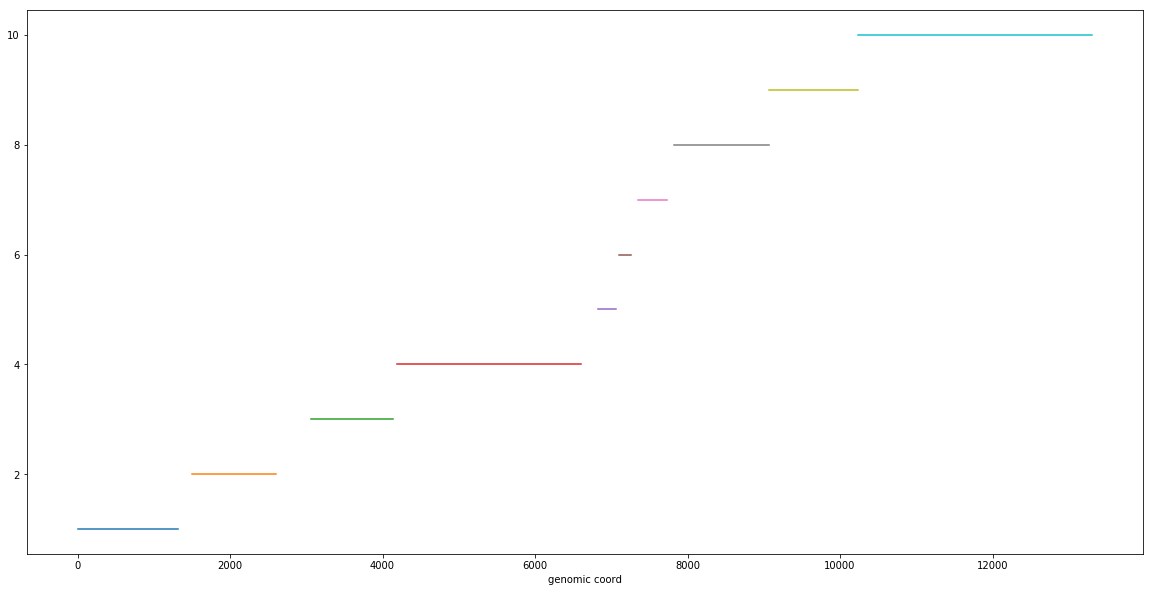

In [27]:
# plot genes in order along the genome. Each line is the span of a gene
plt.figure(figsize=(20,10))

for x,y in test[:10]:
    plt.plot(x, y)
plt.xlabel("genomic coord")
plt.show()

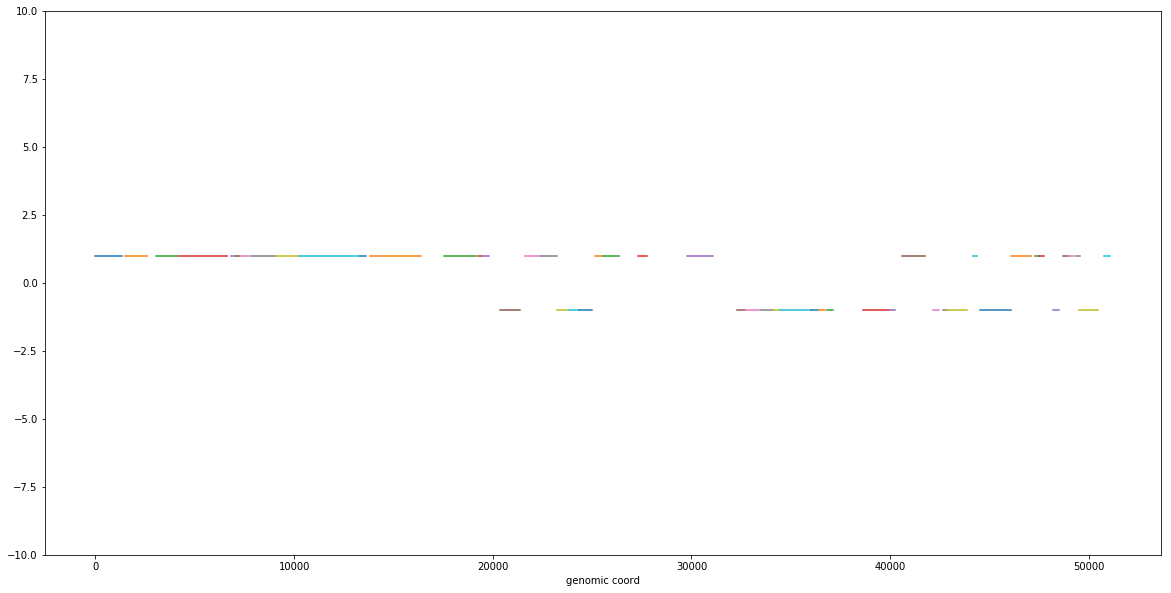

In [28]:
# plot genes in order along the genome. Each line is the span of a gene
plt.figure(figsize=(20,10))

for x,y in test2[:50]:
    plt.plot(x, y)

plt.ylim(-10,10)
plt.xlabel("genomic coord")
plt.show()

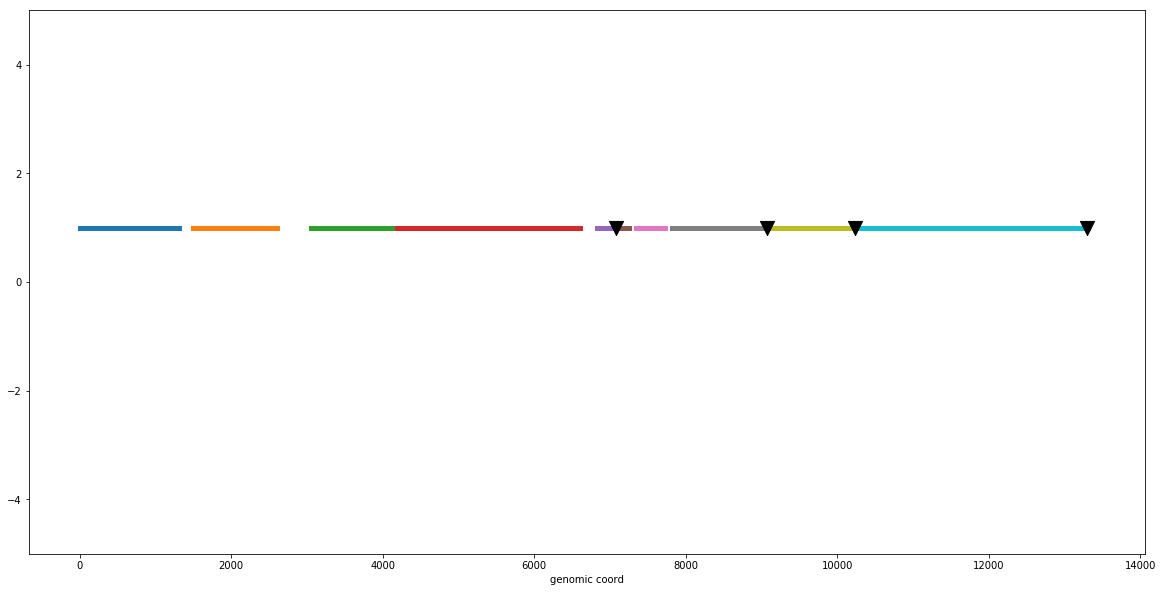

In [29]:
# make a little wedge when 2 genes are close enough to be flagged as "in an operon"
plt.figure(figsize=(20,10))

for x,y in test2[:10]:
    plt.plot(x, y, linewidth=5, zorder=0)

for x,y in operon_locs[:4]:
    plt.scatter(x,y, color="black",marker="v", s=200, zorder=2)

plt.ylim(-5,5)
plt.xlabel("genomic coord")
plt.show()

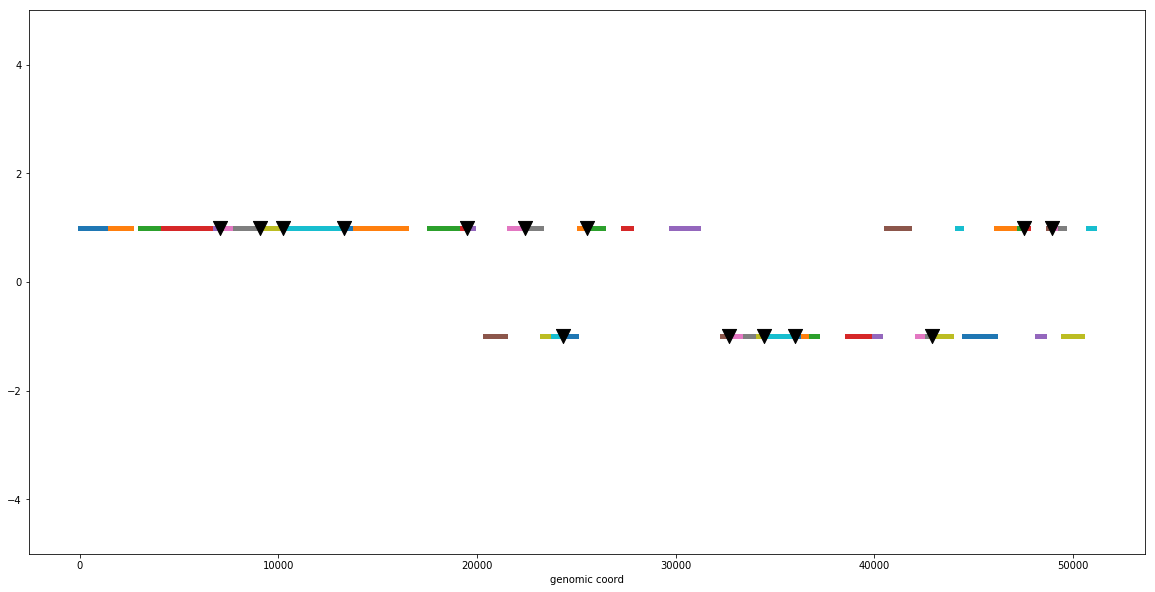

In [30]:
plt.figure(figsize=(20,10))

for x,y in test2[:50]:
    plt.plot(x, y, linewidth=5, zorder=0)

for x,y in operon_locs[:14]:
    plt.scatter(x,y, color="black",marker="v", s=200, zorder=2)

plt.ylim(-5,5)
plt.xlabel("genomic coord")
plt.show()